In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import utils
utils.set_pretty_prints()

In [2]:
DATA_FOLDER = '../data'
DATA_FILE = 'restocracy_all_data.pkl'

In [3]:
with open(os.path.join(DATA_FOLDER, DATA_FILE), 'rb') as fh:
    data = pickle.load(fh)

In [4]:
data[0]

{'price': '202 lei',
 'review': ' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o

In [5]:
len(data)

200

In [6]:
prices = [x['price'] for x in data]
reviews = [x['review'] for x in data]

In [7]:
prices[:5]

['202 lei', '176 lei', '187 lei', '264 lei', '187 lei']

In [8]:
reviews[0]

' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o mica terasa pe acoperis, foarte

In [9]:
reviews[0].split()[:10]

['Noul',
 'restaurant',
 'vedeta',
 'al',
 'Bucurestiului,',
 'o',
 'constructie',
 'geniala',
 'de',
 'marketing']

In [10]:
def get_vocab(lst_docs):
    dct_occ = {}
    for doc in lst_docs:
        words = doc.split()
        for word in words:
            if word in dct_occ:
                dct_occ[word] += 1
            else:
                dct_occ[word] = 1
    occs = [(w, a) for w,a in dct_occ.items()]
    occs = sorted(occs, key=lambda x: x[1], reverse=True)
    dct_w2i = {w[0]:i+1 for i,w in enumerate(occs)}
    dct_w2i['UNK'] = 0
    dct_i2w = {i:w for w,i in dct_w2i.items()}
    return occs, dct_w2i, dct_i2w

In [11]:
oc, w2i, i2w = get_vocab(reviews)
oc[:10]

[('de', 7642),
 ('si', 6195),
 ('in', 3904),
 ('la', 3650),
 ('cu', 3275),
 ('mai', 3019),
 ('ca', 2698),
 ('sa', 2655),
 ('din', 2230),
 ('care', 2147)]

In [12]:
w2i['Noul']

2181

In [13]:
i2w[100]

'bune'

In [14]:
w2i.get('bunicel',0)

0

In [15]:
len(w2i)

22000

In [16]:
def doc_to_tokens(doc, dct_w2i, unk=0):
    tokens = []
    for word in doc.split():
        tokens.append(dct_w2i.get(word, unk))
    return tokens

def tokens_to_doc(tokens, dct_i2w):
    words = []
    for token in tokens:
        words.append(dct_i2w[token])
    return " ".join(words)

In [17]:
t1 = doc_to_tokens(
    doc="ana are foarte multe mere frumusele si putin viermanoase", 
    dct_w2i=w2i
)
t1

[0, 59, 22, 46, 9960, 0, 2, 97, 0]

In [18]:
tokens_to_doc(t1, i2w)

'UNK are foarte multe mere UNK si putin UNK'

(array([72., 83., 19.,  8.,  8.,  1.,  3.,  1.,  3.,  2.]),
 array([  255. ,  3259.2,  6263.4,  9267.6, 12271.8, 15276. , 18280.2,
        21284.4, 24288.6, 27292.8, 30297. ]),
 <a list of 10 Patch objects>)

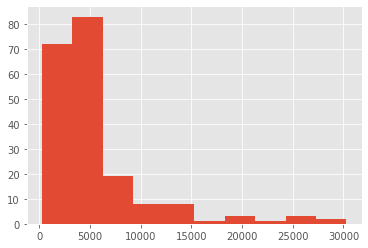

In [19]:
review_lens = [len(r) for r in reviews]
plt.hist(review_lens)

In [20]:
# but we need words
all_data = [doc_to_tokens(doc, dct_w2i=w2i) for doc in reviews]
tokens_to_doc(all_data[10][:10], i2w)

'Ei bine, nu stiu sa raspund la intrebarea asta… E'

In [21]:
reviews[10][:100]

' \n Ei bine, nu stiu sa raspund la intrebarea asta… \n E greu de crezut ca sunt atat de multe restaura'

(array([12., 52., 68., 24., 10., 10.,  4.,  2.,  3.,  5.,  1.,  0.,  1.,
         2.,  0.,  2.,  2.,  0.,  0.,  2.]),
 array([  34. ,  290.5,  547. ,  803.5, 1060. , 1316.5, 1573. , 1829.5,
        2086. , 2342.5, 2599. , 2855.5, 3112. , 3368.5, 3625. , 3881.5,
        4138. , 4394.5, 4651. , 4907.5, 5164. ]),
 <a list of 20 Patch objects>)

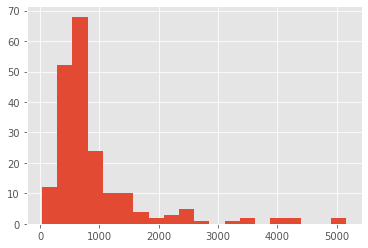

In [22]:
reviews_token_lens = [len(r) for r in all_data]
plt.hist(reviews_token_lens, bins=20)

In [23]:
all_data_fix = [r[:500] for r in all_data]
len(all_data_fix[123])

500

In [24]:
len(reviews[123].split())

838

In [25]:
def token_to_vect(tok, dct_w2i):
    sizev = len(dct_w2i)
    v = np.zeros(sizev)
    v[tok] = 1
    return v

test = [token_to_vect(t, w2i) for t in doc_to_tokens('ana are foarte multe mere frumusele si putin viermanoase', w2i)]
test[0].shape

(22000,)

In [26]:
len(w2i)

22000

In [27]:
test[0][:30]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
test[6][:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
def vects_to_doc(vects, dct_i2w):
    tokens = []
    for v in vects:
        tokens.append(v.argmax())
    return tokens_to_doc(tokens, dct_i2w)

In [30]:
vects_to_doc(test, i2w)

'UNK are foarte multe mere UNK si putin UNK'

### Next steps:
 1. Generate X as either 3D or 2D tensor (each observation as a series of word one-hot encodings or a vector of word occurences)
   - 3D tensor means having `[number_of_documents, number_of_words, vocab_size]`
   - *2D tensor* means having `[number_of_document, vocab_size]` - we just add together all the token-vectors of a review
 2. Prepare y !
 3. Split data
 4. Re-run sanity checks
 5. Create linear regression model
 6. Test linear model
 7. Next to representation learning

In [31]:
all_data_500 = [x[:500] for x in all_data]
print(len(all_data_500))
print(min([len(x) for x in all_data_500]))
print(max([len(x) for x in all_data_500]))
len(all_data_500[0])

200
34
500


500

In [32]:
def tokens_to_tensor(token_docs, dct_w2i):
    lst_all_docs = []
    for token_doc in token_docs:
        np_vect = np.array([token_to_vect(t, dct_w2i) for t in token_doc])
        np_doc_bow = np_vect.sum(axis=0)
        lst_all_docs.append(np_doc_bow)
    return np.array(lst_all_docs)
    

X = tokens_to_tensor(all_data_500, dct_w2i=w2i)
X.shape

(200, 22000)

In [33]:
X[:5,:40]

array([[ 0., 24., 25., 14.,  8., 10.,  6.,  6.,  6.,  3.,  6.,  6.,  5.,
         8.,  5.,  8.,  9.,  3.,  6.,  4.,  4.,  9.,  5.,  0.,  1.,  1.,
         2.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
         0.],
       [ 0., 17., 19.,  9., 10.,  6.,  5., 13.,  5.,  5.,  4.,  3.,  7.,
         4.,  3.,  3., 14.,  1., 12.,  4.,  5.,  5.,  3.,  3.,  4.,  0.,
         1.,  1.,  3.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  6.,  1.,  0.,
         1.],
       [ 0., 26.,  7., 14., 12.,  4.,  9.,  9.,  4.,  8.,  9.,  4.,  5.,
         9.,  3.,  2.,  9.,  3.,  3.,  2.,  4.,  6.,  4.,  3.,  5.,  1.,
         2.,  0.,  1.,  2.,  0.,  4.,  1.,  2.,  0.,  0.,  3.,  0.,  0.,
         1.],
       [ 0., 17., 14., 11., 10., 10., 11.,  9.,  7.,  8.,  6.,  2.,  6.,
         6.,  6.,  3.,  5.,  2.,  3.,  2.,  2.,  6.,  2.,  2.,  2.,  1.,
         0.,  0.,  0.,  1.,  3.,  0.,  1.,  2.,  0.,  0.,  2.,  1.,  0.,
         0.],
       [ 0., 10., 13.,  7.,  9.,  7.,  5.,  2.,  2.,  2.,  3.,  6., 

In [34]:
prices[:5]

['202 lei', '176 lei', '187 lei', '264 lei', '187 lei']

In [35]:
y = np.array([int(x.split()[0]) for x in prices])
y[:10]

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288])

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_dev, y_train, y_dev = train_test_split(X, y, test_size=0.10, random_state=1010)

In [37]:
print(x_train.shape)
print(x_dev.shape)
print(y_train.shape)
print(y_dev.shape)

(180, 22000)
(20, 22000)
(180,)
(20,)


### Modify next cell to use (S)GD with some penalty

In [39]:
n_feats = x_train.shape[1]
# normal equation take a LOT due to inverse of [22000,22000] matrix
# Theta = (X^T.X)^{-1}.X^T.y
# Theta = np.linalg.pinv(x_train.T.dot(x_train) + 1.0 * np.eye(n_feats)).dot(x_train.T).dot(y_train)
#y_pred = x_dev.dot(Theta)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_dev)

In [40]:
y_pred

array([134.55, 164.09, 152.87, 110.93, 126.65, 187.6 , 151.64, 146.7 ,
       140.66, 199.09, 144.81, 140.4 , 124.35, 131.24, 132.02, 147.62,
       122.15, 147.05, 133.61, 144.92])

In [41]:
import pandas as pd

df_results = pd.DataFrame(
    {
        'Pred' : y_pred,
        'Real' : y_dev,
    }
)
df_results

,Pred,Real
0,134.5496,77
1,164.0886,104
2,152.8717,259
3,110.9309,82
4,126.6479,106
5,187.6044,208
6,151.6383,117
7,146.7017,82
8,140.6580,189
9,199.0940,130


In [42]:
x_mean = x_train.mean()
x_std = x_train.std()
y_mean = y_train.mean()
y_std = y_train.std()

x_train_n = (x_train - x_mean) / x_std
y_train_n = (y_train - y_mean) / y_std

x_dev_n = (x_dev - x_mean) / x_std
y_dev_n = (y_dev - y_mean) / y_std

print("x_train_n {:.2f} / {:.2f}".format(x_train_n.min(), x_train_n.max()))


x_train_n -0.07 / 105.15


### Modify next cell to use (S)GD with some penalty

In [45]:
# normal equation take a LOT due to inverse of [22000,22000] matrix
# Theta = (X^T.X)^{-1}.X^T.y
#Theta_n = np.linalg.pinv(x_train_n.T.dot(x_train_n) + 1.0 * np.eye(n_feats)).dot(x_train_n.T).dot(y_train_n)
#y_pred_n = x_dev_n.dot(Theta_n)


from sklearn.linear_model import LinearRegression
model_n = LinearRegression()
model_n.fit(x_train_n, y_train_n)
y_pred_n = model_n.predict(x_dev_n)

y_pred_n_dn = y_pred_n * y_std + y_mean

df_results_n = pd.DataFrame(
    {
        'Pred' : y_pred_n_dn,
        'Real' : y_dev,
    }
)
df_results_n

,Pred,Real
0,134.3858,77
1,163.7079,104
2,153.3514,259
3,110.3979,82
4,127.9706,106
5,187.4618,208
6,151.6977,117
7,147.4539,82
8,141.5068,189
9,199.8284,130


## Homework

1. Write your own GD loop with L1 or L2 regularization using objective function `mean((y_pred - y_true) ** 2)`
2. Change data pre-processing in order (maybe) to obtain a better result
3. Try to write a mini grid-search loop to search for best approach within above set of options